# Crowaling Komentar Tiktok

In [ ]:
#!pip install apify-clientz

In [ ]:
#from apify_client import ApifyClient

#Initialize the ApifyClient with your API token

# Prepare the Actor input
#run_input = {
    #"commentsPerPost": 1000,
    #"excludePinnedPosts": False,
    #"maxRepliesPerComment": 20,
    #"postURLs": ["https://www.tiktok.com/@affliashe/video/7558518681282628876?is_from_webapp=1&sender_device=pc&web_id=7507848113807017490"],
    #"resultsPerPage": 100
#}

# Run the Actor and wait for it to finish

# Fetch and print Actor results from the run's dataset (if there are any)
#items = list(client.dataset(run["defaultDatasetId"]).iterate_items())

In [ ]:
#import pandas as pd
#df =  pd.DataFrame(items)
#df

In [ ]:
#df.to_csv("komentar_tiktok.csv", index=False)

# Load Data Set

In [ ]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv ("/content/komentar_tiktok_berlabel.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    994 non-null    object
 1   Label   999 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
df.head()

,Text,Label
0,ini salah satu alasan kenapa pratama arhan lan...,kecewa
1,dari anya ke anyir😭,benci
2,Ini satria mahathir versi cewek ya ?,kecewa
3,Umur baru 20 an tapi kasusnya udah banyak banget😂,kecewa
4,dari anya ke anying😭🙏🏻,benci


In [ ]:
df.describe()

,Text,Label
count,994,999
unique,974,5
top,😭,kecewa
freq,6,745


# Preprocessing Data

### Hapus nilai NAN

In [ ]:
data = pd.read_csv("/content/komentar_tiktok_berlabel.csv")

# Hapus baris dengan label kosong (NaN)
data = data.dropna(subset=['Label'])

# Tampilkan 5 data teratas
print("\n data setelah pembersihan:")
print(data.head(10))



 data setelah pembersihan:
                                                Text   Label
0  ini salah satu alasan kenapa pratama arhan lan...  kecewa
1                                dari anya ke anyir😭   benci
2               Ini satria mahathir versi cewek ya ?  kecewa
3  Umur baru 20 an tapi kasusnya udah banyak banget😂  kecewa
4                             dari anya ke anying😭🙏🏻   benci
5  Gaes yuk balikin followers nurul ke semula yg ...  kecewa
6  Pdhal lebih mantep Anya Geraldine daripada sin...   benci
7                                     CANCEL CULTURE   benci
8          dia tuh kayak mau milikin semua laki gitu  kecewa
9                       dari anya ke anyeng anyengan   benci


### Menghapus URL, mention (@), dan hashtag (#).

In [ ]:
text_column = "Text"    # kolom teks
label_column = "Label"  # kolom label

In [ ]:
def clean_text_all(text):
    if pd.isna(text):
        return ""
    text = str(text)

    # Hapus URL, mention, hashtag
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)

    # Hapus emoji & karakter non-ASCII (termasuk emoticon)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)

    # Hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    return text

data['clean_text'] = data[text_column].apply(clean_text_all)
print("\nHasil setelah bersih dari emoji:")
print(data[[text_column, 'clean_text']].head(10))



Hasil setelah bersih dari emoji:
                                                Text  \
0  ini salah satu alasan kenapa pratama arhan lan...   
1                                dari anya ke anyir😭   
2               Ini satria mahathir versi cewek ya ?   
3  Umur baru 20 an tapi kasusnya udah banyak banget😂   
4                             dari anya ke anying😭🙏🏻   
5  Gaes yuk balikin followers nurul ke semula yg ...   
6  Pdhal lebih mantep Anya Geraldine daripada sin...   
7                                     CANCEL CULTURE   
8          dia tuh kayak mau milikin semua laki gitu   
9                       dari anya ke anyeng anyengan   

                                          clean_text  
0  ini salah satu alasan kenapa pratama arhan lan...  
1                                 dari anya ke anyir  
2               Ini satria mahathir versi cewek ya ?  
3   Umur baru 20 an tapi kasusnya udah banyak banget  
4                                dari anya ke anying  
5  Gaes yuk balikin

### Tokenisasi teks.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    text = str(text)
    tokens = word_tokenize(text)
    return tokens


data['tokens'] = data['clean_text'].apply(tokenize_text)
print("\nHasil Tokenisasi")
print(data[['clean_text', 'tokens']].head(10))


Hasil Tokenisasi
                                          clean_text  \
0  ini salah satu alasan kenapa pratama arhan lan...   
1                                 dari anya ke anyir   
2               Ini satria mahathir versi cewek ya ?   
3   Umur baru 20 an tapi kasusnya udah banyak banget   
4                                dari anya ke anying   
5  Gaes yuk balikin followers nurul ke semula yg ...   
6  Pdhal lebih mantep Anya Geraldine daripada sin...   
7                                     CANCEL CULTURE   
8          dia tuh kayak mau milikin semua laki gitu   
9                       dari anya ke anyeng anyengan   

                                              tokens  
0  [ini, salah, satu, alasan, kenapa, pratama, ar...  
1                            [dari, anya, ke, anyir]  
2       [Ini, satria, mahathir, versi, cewek, ya, ?]  
3  [Umur, baru, 20, an, tapi, kasusnya, udah, ban...  
4                           [dari, anya, ke, anying]  
5  [Gaes, yuk, balikin, followers, 

### Penghapusan stopwords.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered = [word for word in tokens if word.lower() not in stop_words]
    return filtered


data['filtered_tokens'] = data['tokens'].apply(remove_stopwords)
print("\nHasil Penghapusan Stopwords")
print(data[['tokens', 'filtered_tokens']].head(10))



Hasil Penghapusan Stopwords
                                              tokens  \
0  [ini, salah, satu, alasan, kenapa, pratama, ar...   
1                            [dari, anya, ke, anyir]   
2       [Ini, satria, mahathir, versi, cewek, ya, ?]   
3  [Umur, baru, 20, an, tapi, kasusnya, udah, ban...   
4                           [dari, anya, ke, anying]   
5  [Gaes, yuk, balikin, followers, nurul, ke, sem...   
6  [Pdhal, lebih, mantep, Anya, Geraldine, daripa...   
7                                  [CANCEL, CULTURE]   
8  [dia, tuh, kayak, mau, milikin, semua, laki, g...   
9                 [dari, anya, ke, anyeng, anyengan]   

                                     filtered_tokens  
0  [ini, salah, satu, alasan, kenapa, pratama, ar...  
1                            [dari, anya, ke, anyir]  
2       [Ini, satria, mahathir, versi, cewek, ya, ?]  
3  [Umur, baru, 20, tapi, kasusnya, udah, banyak,...  
4                           [dari, anya, ke, anying]  
5  [Gaes, yuk, balikin, 

### Case Folding

In [ ]:
# Ubah seluruh teks di kolom 'clean_text' menjadi huruf kecil
data['lower_text'] = data['clean_text'].str.lower()

print("\nHasil Lowercase:")
print(data[['clean_text', 'lower_text']].head(10))


Hasil Lowercase:
                                          clean_text  \
0  ini salah satu alasan kenapa pratama arhan lan...   
1                                 dari anya ke anyir   
2               Ini satria mahathir versi cewek ya ?   
3   Umur baru 20 an tapi kasusnya udah banyak banget   
4                                dari anya ke anying   
5  Gaes yuk balikin followers nurul ke semula yg ...   
6  Pdhal lebih mantep Anya Geraldine daripada sin...   
7                                     CANCEL CULTURE   
8          dia tuh kayak mau milikin semua laki gitu   
9                       dari anya ke anyeng anyengan   

                                          lower_text  
0  ini salah satu alasan kenapa pratama arhan lan...  
1                                 dari anya ke anyir  
2               ini satria mahathir versi cewek ya ?  
3   umur baru 20 an tapi kasusnya udah banyak banget  
4                                dari anya ke anying  
5  gaes yuk balikin followers nurul

In [ ]:
# 2) Fungsi normalize_text — pastikan ada sebelum dipakai
def normalize_text(text):
    # aman untuk NaN
    if pd.isna(text):
        return ""
    # pastikan string & sudah lowercase (tapi kita juga lower lagi utk safety)
    text = str(text).lower().strip()

    # split sederhana (bisa diganti tokenizer kalau butuh lebih akurat)
    words = text.split()
    normalized_words = [normalization_dict.get(w, w) for w in words]
    return " ".join(normalized_words)

In [ ]:
normalization_dict = {
    "gpp": "tidak apa apa",
    "ga": "tidak",
    "gak": "tidak",
    "ngga": "tidak",
    "nggak": "tidak",
    "yg": "yang",
    "aja": "saja",
    "udh": "sudah",
    "udah": "sudah",
    "kalo": "kalau",
    "ni": "ini",
    "dgn": "dengan",
    "bgt": "banget",
    "bener": "benar",
    "tp": "tapi",
    "krn": "karena",
    "sm": "sama",
    "dr": "dari",
    "lg": "lagi",
    "dpt": "dapat"
}
data['normalized_text'] = data['lower_text'].apply(normalize_text)
print(data[['lower_text', 'normalized_text']].head(10))

                                          lower_text  \
0  ini salah satu alasan kenapa pratama arhan lan...   
1                                 dari anya ke anyir   
2               ini satria mahathir versi cewek ya ?   
3   umur baru 20 an tapi kasusnya udah banyak banget   
4                                dari anya ke anying   
5  gaes yuk balikin followers nurul ke semula yg ...   
6  pdhal lebih mantep anya geraldine daripada sin...   
7                                     cancel culture   
8          dia tuh kayak mau milikin semua laki gitu   
9                       dari anya ke anyeng anyengan   

                                     normalized_text  
0  ini salah satu alasan kenapa pratama arhan lan...  
1                                 dari anya ke anyir  
2               ini satria mahathir versi cewek ya ?  
3  umur baru 20 an tapi kasusnya sudah banyak banget  
4                                dari anya ke anying  
5  gaes yuk balikin followers nurul ke semula yan... 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit dan transform kolom Label
data['encoded_label'] = label_encoder.fit_transform(data['Label'])


# Tampilkan contoh hasil (teks + label + hasil encode)
print("\n=== Data Setelah Label Encoding ===")
print(data[['normalized_text', 'Label', 'encoded_label']].head(10))



=== Data Setelah Label Encoding ===
                                     normalized_text   Label  encoded_label
0  ini salah satu alasan kenapa pratama arhan lan...  kecewa              1
1                                 dari anya ke anyir   benci              0
2               ini satria mahathir versi cewek ya ?  kecewa              1
3  umur baru 20 an tapi kasusnya sudah banyak banget  kecewa              1
4                                dari anya ke anying   benci              0
5  gaes yuk balikin followers nurul ke semula yan...  kecewa              1
6  pdhal lebih mantep anya geraldine daripada sin...   benci              0
7                                     cancel culture   benci              0
8          dia tuh kayak mau milikin semua laki gitu  kecewa              1
9                       dari anya ke anyeng anyengan   benci              0


### Ekstrasi Fitur

##TF -IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))

# Fit dan transform teks menjadi matriks TF-IDF
X_tfidf = tfidf.fit_transform(data['normalized_text']).toarray()

tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())
print("\nTabel Hasil TF-IDF:")
print(tfidf_df.head())


Tabel Hasil TF-IDF:
    10  1000  1000 itu  1001  1001 cra        20     20 an  20 tapi  2005  \
0  0.0   0.0       0.0   0.0       0.0  0.000000  0.000000      0.0   0.0   
1  0.0   0.0       0.0   0.0       0.0  0.000000  0.000000      0.0   0.0   
2  0.0   0.0       0.0   0.0       0.0  0.000000  0.000000      0.0   0.0   
3  0.0   0.0       0.0   0.0       0.0  0.336286  0.356311      0.0   0.0   
4  0.0   0.0       0.0   0.0       0.0  0.000000  0.000000      0.0   0.0   

   2005 kah  ...  zize jauh  zize kah  zize kalau  zize karena  zize nurul  \
0       0.0  ...        0.0       0.0         0.0     0.259354         0.0   
1       0.0  ...        0.0       0.0         0.0     0.000000         0.0   
2       0.0  ...        0.0       0.0         0.0     0.000000         0.0   
3       0.0  ...        0.0       0.0         0.0     0.000000         0.0   
4       0.0  ...        0.0       0.0         0.0     0.000000         0.0   

   zize nya  zize omgg  zize pas  zize sama   z

## Bag of Words (BoW)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=2000, ngram_range=(1, 2))


# Fit dan transform teks menjadi vektor
X = vectorizer.fit_transform(data['normalized_text']).toarray()


bow_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
print("\nTabel Hasil Bag of Words (BoW):")
print(bow_df.head())


Tabel Hasil Bag of Words (BoW):
   10  1000  1000 itu  1001  1001 cra  20  20 an  20 tapi  2005  2005 kah  \
0   0     0         0     0         0   0      0        0     0         0   
1   0     0         0     0         0   0      0        0     0         0   
2   0     0         0     0         0   0      0        0     0         0   
3   0     0         0     0         0   1      1        0     0         0   
4   0     0         0     0         0   0      0        0     0         0   

   ...  zize jauh  zize kah  zize kalau  zize karena  zize nurul  zize nya  \
0  ...          0         0           0            1           0         0   
1  ...          0         0           0            0           0         0   
2  ...          0         0           0            0           0         0   
3  ...          0         0           0            0           0         0   
4  ...          0         0           0            0           0         0   

   zize omgg  zize pas  zize sama  

# Inisiasi input dan target class

In [ ]:
X = X_tfidf
y = data['Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,       # 80% training, 20% validasi
    random_state=42,     # biar hasilnya konsisten
    stratify=y           # menjaga proporsi kelas tetap sama
)

In [ ]:
print("\nJumlah data training:", X_train.shape[0])
print("Jumlah data validasi:", X_val.shape[0])


Jumlah data training: 799
Jumlah data validasi: 200


# Evaluasi model

## Model SVM

=== Evaluasi Model: Support Vector Machine (SVM) ===
Akurasi SVM: 0.7500

=== Classification Report ===
              precision    recall  f1-score   support

       benci       0.29      0.10      0.15        20
      kecewa       0.77      0.97      0.86       149
       marah       0.00      0.00      0.00         9
       sedih       1.00      0.43      0.60         7
      senang       0.33      0.07      0.11        15

    accuracy                           0.75       200
   macro avg       0.48      0.31      0.34       200
weighted avg       0.66      0.75      0.68       200



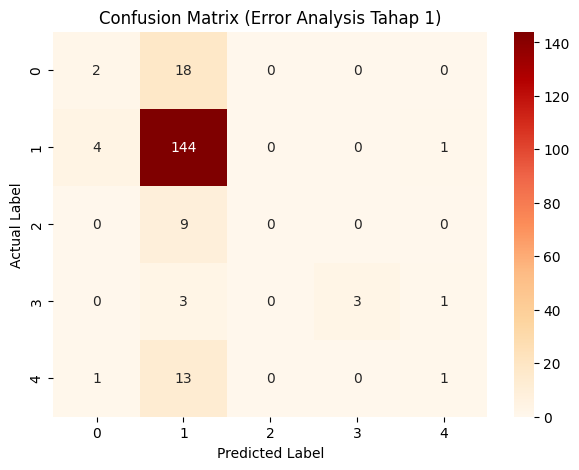

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Inisiasi dan Training Model SVM ===
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# === Prediksi Data Validasi ===
y_pred_svm = svm_model.predict(X_val)

# === Evaluasi ===
acc_svm = accuracy_score(y_val, y_pred_svm)
print("=== Evaluasi Model: Support Vector Machine (SVM) ===")
print(f"Akurasi SVM: {acc_svm:.4f}")

print("\n=== Classification Report ===")
print(classification_report(
    y_val,
    y_pred_svm,
    target_names=['benci', 'kecewa', 'marah', 'sedih', 'senang'],
    zero_division=0
))

# === Confusion Matrix ===
cm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix (Error Analysis Tahap 1)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


## Naive Bayes

=== Evaluasi Model: Naive Bayes (MultinomialNB) ===
Akurasi Naive Bayes: 0.7450

=== Classification Report ===
              precision    recall  f1-score   support

       benci       0.00      0.00      0.00        20
      kecewa       0.74      1.00      0.85       149
       marah       0.00      0.00      0.00         9
       sedih       0.00      0.00      0.00         7
      senang       0.00      0.00      0.00        15

    accuracy                           0.74       200
   macro avg       0.15      0.20      0.17       200
weighted avg       0.56      0.74      0.64       200



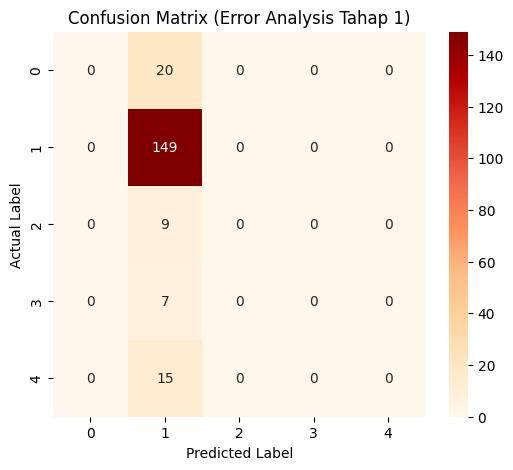

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Inisiasi dan Training Model Naive Bayes ===
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# === Prediksi Data Validasi ===
y_pred_nb = nb_model.predict(X_val)

acc_nb = accuracy_score(y_val, y_pred_nb)
print("=== Evaluasi Model: Naive Bayes (MultinomialNB) ===")
print(f"Akurasi Naive Bayes: {acc_nb:.4f}")

print("\n=== Classification Report ===")
print(classification_report(
    y_val,
    y_pred_nb,
    target_names=['benci', 'kecewa', 'marah', 'sedih', 'senang'],
    zero_division=0
))

# === Confusion Matrix ===
cm = confusion_matrix(y_val, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix (Error Analysis Tahap 1)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


## Random Forest

=== Evaluasi Model: Random Forest ===
Akurasi Random Forest: 0.7600

=== Classification Report ===
              precision    recall  f1-score   support

       benci       0.00      0.00      0.00        20
      kecewa       0.77      0.99      0.86       149
       marah       0.00      0.00      0.00         9
       sedih       1.00      0.29      0.44         7
      senang       1.00      0.20      0.33        15

    accuracy                           0.76       200
   macro avg       0.55      0.29      0.33       200
weighted avg       0.68      0.76      0.68       200



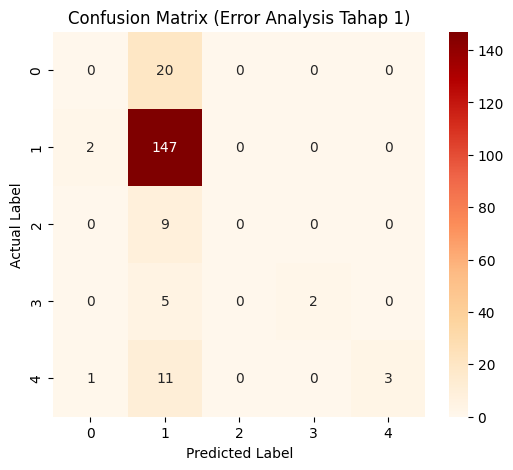

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Inisiasi dan Training Model Random Forest ===
rf_model = RandomForestClassifier(
    n_estimators=200,     # jumlah pohon
    random_state=42,      # agar hasil konsisten
    n_jobs=-1             # gunakan semua core CPU
)
rf_model.fit(X_train, y_train)

# === Prediksi Data Validasi ===
y_pred_rf = rf_model.predict(X_val)

# === Evaluasi Akurasi ===
acc_rf = accuracy_score(y_val, y_pred_rf)
print("=== Evaluasi Model: Random Forest ===")
print(f"Akurasi Random Forest: {acc_rf:.4f}")

print("\n=== Classification Report ===")
print(classification_report(
    y_val,
    y_pred_rf,
    target_names=['benci', 'kecewa', 'marah', 'sedih', 'senang'],
    zero_division=0
))

# === Confusion Matrix ===
cm = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix (Error Analysis Tahap 1)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


# Eror Analisis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

model_aktif = svm_model

# Prediksi pada data validasi
y_pred = model_aktif.predict(X_val)

# Buat DataFrame hasil prediksi
error_df = pd.DataFrame({
    'Label_Asli': y_val,
    'Prediksi': y_pred
})

# Filter data yang salah klasifikasi
error_df = error_df[error_df['Label_Asli'] != error_df['Prediksi']]

print("Jumlah kesalahan prediksi:", len(error_df))
print("\n10 data yang salah diklasifikasikan:\n")
print(error_df.head(10))

Jumlah kesalahan prediksi: 50

10 data yang salah diklasifikasikan:

    Label_Asli Prediksi
701     kecewa    benci
981      benci   kecewa
24       marah   kecewa
977     kecewa    benci
541     senang   kecewa
832     senang   kecewa
334      marah   kecewa
841      benci   kecewa
48      senang   kecewa
961      benci   kecewa


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

model_aktif = nb_model

# Prediksi pada data validasi
y_pred = model_aktif.predict(X_val)

# Buat DataFrame hasil prediksi
error_df = pd.DataFrame({
    'Label_Asli': y_val,
    'Prediksi': y_pred
})

# Filter data yang salah klasifikasi
error_df = error_df[error_df['Label_Asli'] != error_df['Prediksi']]

print("Jumlah kesalahan prediksi:", len(error_df))
print("\n10 data yang salah diklasifikasikan:\n")
print(error_df.head(10))

Jumlah kesalahan prediksi: 51

10 data yang salah diklasifikasikan:

    Label_Asli Prediksi
954     senang   kecewa
981      benci   kecewa
24       marah   kecewa
541     senang   kecewa
832     senang   kecewa
334      marah   kecewa
841      benci   kecewa
48      senang   kecewa
961      benci   kecewa
983     senang   kecewa


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

model_aktif = rf_model

# Prediksi pada data validasi
y_pred = model_aktif.predict(X_val)

error_df = pd.DataFrame({
    'Label_Asli': y_val,
    'Prediksi': y_pred
})

error_df = error_df[error_df['Label_Asli'] != error_df['Prediksi']]

print("Jumlah kesalahan prediksi:", len(error_df))
print("\n10 data yang salah diklasifikasikan:\n")
print(error_df.head(10))

Jumlah kesalahan prediksi: 48

10 data yang salah diklasifikasikan:

    Label_Asli Prediksi
701     kecewa    benci
981      benci   kecewa
24       marah   kecewa
541     senang   kecewa
832     senang   kecewa
334      marah   kecewa
841      benci   kecewa
48      senang   kecewa
961      benci   kecewa
983     senang   kecewa


# Deep Learning LSTM dan CNN

In [ ]:
print(data.columns)
print(data['Label'].unique())

Index(['Text', 'Label', 'clean_text', 'tokens', 'filtered_tokens',
       'lower_text', 'normalized', 'normalized_text', 'encoded_label',
       'Label_encoded'],
      dtype='object')
['kecewa' 'benci' 'marah' 'senang' 'sedih']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Label_encoded'] = le.fit_transform(data['Label'])

print("Mapping Label → Angka:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Mapping Label → Angka:
{'benci': np.int64(0), 'kecewa': np.int64(1), 'marah': np.int64(2), 'sedih': np.int64(3), 'senang': np.int64(4)}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode label teks menjadi angka
le = LabelEncoder()
data['Label_encoded'] = le.fit_transform(data['Label'])

# Ambil teks & label
texts = data['normalized_text'].astype(str).tolist()
labels = data['Label_encoded'].tolist()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np


# --- Ambil teks & label (gunakan Label_encoded, bukan .astype(int) pada kolom teks) ---
texts = data['normalized_text'].astype(str).tolist()
labels = data['Label_encoded'].astype(int).tolist()

# --- Tokenizing ---
MAX_WORDS = 10000
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# --- Padding ---
MAX_LEN = 100
X = pad_sequences(sequences, maxlen=MAX_LEN, padding="post", truncating="post")
y = np.array(labels)

# --- Split train-val (gunakan stratify untuk menjaga distribusi kelas) ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Shape X_train:", X_train.shape)
print("Shape X_val:", X_val.shape)
print("Distribusi label (train):", np.bincount(y_train))
print("Distribusi label (val):", np.bincount(y_val))

Shape X_train: (799, 100)
Shape X_val: (200, 100)
Distribusi label (train): [ 81 596  36  29  57]
Distribusi label (val): [ 20 149   9   7  15]


## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

EMBED_DIM = 128

lstm_model = models.Sequential([
    layers.Embedding(MAX_WORDS, EMBED_DIM, input_length=MAX_LEN),
    layers.LSTM(128, return_sequences=False),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax")   # 5 kelas: benci, kecewa, marah, sedih, senang
])

lstm_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.6406 - loss: 1.1996 - val_accuracy: 0.7450 - val_loss: 0.9247
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.7134 - loss: 1.0018 - val_accuracy: 0.7450 - val_loss: 0.9272
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7482 - loss: 0.9182 - val_accuracy: 0.7450 - val_loss: 0.9014
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7513 - loss: 0.8870 - val_accuracy: 0.7450 - val_loss: 0.9030
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.7356 - loss: 0.9307 - val_accuracy: 0.7450 - val_loss: 0.9016
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7448 - loss: 0.9014 - val_accuracy: 0.7450 - val_loss: 0.9021
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7790 - loss: 0.8266 - val_accuracy: 0.7450 - val_loss: 0.9120
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7369 - loss: 0.9241 - val_accuracy: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step

=== Evaluasi LSTM ===
              precision    recall  f1-score   support

       benci       0.00      0.00      0.00        20
      kecewa       0.74      1.00      0.85       149
       marah       0.00      0.00      0.00         9
       sedih       0.00      0.00      0.00         7
      senang       0.00      0.00      0.00        15

    accuracy                           0.74       200
   macro avg       0.15      0.20      0.17       200
weighted avg       0.56      0.74      0.64       200



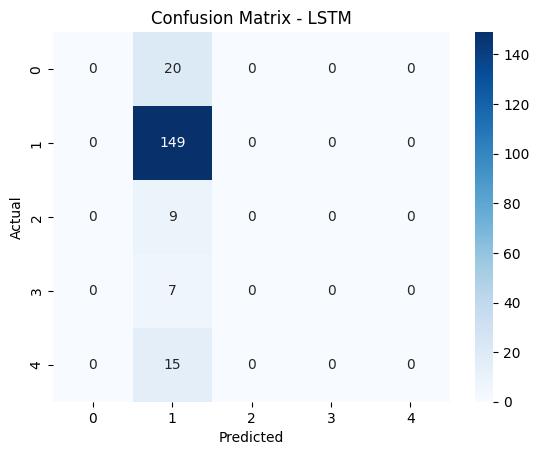

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred_lstm = np.argmax(lstm_model.predict(X_val), axis=1)

print("\n=== Evaluasi LSTM ===")
print(classification_report(
    y_val, y_pred_lstm,
    target_names=['benci', 'kecewa', 'marah', 'sedih', 'senang'],
    zero_division=0
))

cm = confusion_matrix(y_val, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## CNN

In [ ]:
cnn_model = models.Sequential([
    layers.Embedding(MAX_WORDS, EMBED_DIM, input_length=MAX_LEN),
    layers.Conv1D(128, 5, activation="relu"),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax")
])

cnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.6607 - loss: 1.2375 - val_accuracy: 0.7450 - val_loss: 0.9051
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7389 - loss: 0.9059 - val_accuracy: 0.7450 - val_loss: 0.8983
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7284 - loss: 0.8944 - val_accuracy: 0.7450 - val_loss: 0.9079
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7439 - loss: 0.7829 - val_accuracy: 0.7450 - val_loss: 0.8796
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7711 - loss: 0.6716 - val_accuracy: 0.7500 - val_loss: 0.8524
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8783 - loss: 0.4159 - val_accuracy: 0.7600 - val_loss: 0.8058
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9220 - loss: 0.2791 - val_accuracy: 0.7450 - val_loss: 0.8366
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9565 - loss: 0.1665 - val_accuracy: 0.7600 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step

=== Evaluasi CNN ===
              precision    recall  f1-score   support

       benci       0.56      0.25      0.34        20
      kecewa       0.80      0.95      0.87       149
       marah       0.00      0.00      0.00         9
       sedih       0.00      0.00      0.00         7
      senang       0.21      0.20      0.21        15

    accuracy                           0.74       200
   macro avg       0.31      0.28      0.28       200
weighted avg       0.67      0.74      0.69       200



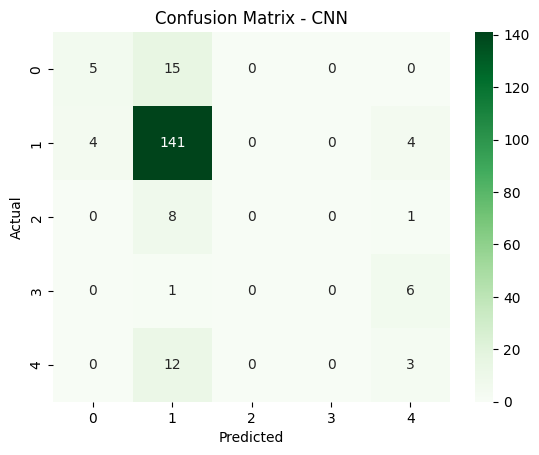

In [ ]:
y_pred_cnn = np.argmax(cnn_model.predict(X_val), axis=1)

print("\n=== Evaluasi CNN ===")
print(classification_report(
    y_val,
    y_pred_cnn,
    target_names=['benci', 'kecewa', 'marah', 'sedih', 'senang'],
    zero_division=0
))

cm = confusion_matrix(y_val, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["LSTM", "CNN"],
    "Akurasi": [
        history_lstm.history["val_accuracy"][-1],
        history_cnn.history["val_accuracy"][-1]
    ]
})

print(results)

  Model  Akurasi
0  LSTM    0.745
1   CNN    0.745
